In [81]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import wordnet
nltk.download('wordnet')
sns.set_theme(style='darkgrid')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/joanna_liang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
with open('buzzer.pkl', 'rb') as f:
    buzzer_exp = pickle.load(f)
[(key, len(value)) for key, value in buzzer_exp.items()]

[('waiting', 3159), ('timid', 581), ('best', 365), ('aggressive', 363)]

# Answer 1

## Confused answers

In [71]:
def print_histplot(line_data, title=''):
    ax = sns.histplot(data=line_data, kde=True, stat='frequency')
    if title != '':
        ax.set(title=title)
    ax.set_xticks(range(10))
    return 

In [111]:
def evaluate_syn(cur_type, exp_guesser):
    cur_type_question = [item['text'] for item in exp_guesser[cur_type] if item['answer'] is not None]
    cur_type_answer = [item['answer'] for item in exp_guesser[cur_type] if item['answer'] is not None]
    print(f"{cur_type} answers: {cur_type_answer[:10]}")
    len_syn = [len(wordnet.synsets(item)) for item in cur_type_answer]
    print(f"{cur_type} answers: mean of synset: {np.mean(len_syn)}")
    # print_histplot(len_syn, title=cur_type)
    return cur_type_question, cur_type_answer, len_syn

In [29]:
with open('guesser.pkl', 'rb') as f:
    guesser_exp = pickle.load(f)
[(key, len(value)) for key, value in guesser_exp.items()]

[('hit', 218), ('miss', 183), ('close', 99)]

In [112]:
cur_type = 'close'
close_q, close_ans, close_len = evaluate_syn(cur_type=cur_type, exp_guesser=guesser_exp)

cur_type = 'hit'
hit_q, hit_ans, hit_len = evaluate_syn(cur_type=cur_type, exp_guesser=guesser_exp)

cur_type = 'miss'
miss_q, miss_ans, miss_len = evaluate_syn(cur_type=cur_type, exp_guesser=guesser_exp)

close answers: ['Mass_(music)', 'Byzantine_Empire', 'Russian_Empire', "Young's_interference_experiment", 'Sandman', 'Los_Angeles', 'Lord_Byron', 'Matthew_Arnold', 'S-waves', 'Density']
close answers: mean of synset: 0.48484848484848486
hit answers: ['Texas_annexation', 'Martin_Scorsese', 'Spin_(physics)', 'Rembrandt', 'DNA', 'Croesus', 'Gerard_Manley_Hopkins', 'Inflation_(cosmology)', 'David_Hume', 'Andrew_Marvell']
hit answers: mean of synset: 0.7568807339449541
miss answers: ['Lana_Del_Rey', 'Hannibal', 'State_of_Washington', 'Latin', 'Isolde', 'North_Macedonia', 'Lysis', 'Outkast', 'Swing_(seat)', 'Albatrosses']
miss answers: mean of synset: 1.0402298850574712


In [97]:
print(", ".join(close_ans))

Mass_(music), Byzantine_Empire, Russian_Empire, Young's_interference_experiment, Sandman, Los_Angeles, Lord_Byron, Matthew_Arnold, S-waves, Density, Georgia_(country), Luminosity, Apollo, Mrs_Dalloway, Winged_Victory_of_Samothrace, Pudd'nhead_Wilson, Roland, Silicon, Rand_Paul, Sikh_gurus, António_de_Oliveira_Salazar, Hannah_Arendt, Momentum, Pareto_efficiency, 1890, Mali_Empire, Trobriand_people, Indian_National_Congress, Maya_Hero_Twins, Angola, Symphony_No._3_(Beethoven), Death_of_a_Salesman, Dôle, Honoré_de_Balzac, Viola, Hussite_Wars, Nelson_Rockefeller, Julio_Cortázar, Turing_machine, Battle_of_Megiddo_(15th_century_BC), Deformation_(physics), The_English_Commentary_of_the_Holy_Quran, Scheduling_(computing), Diabelli_Variations, Quantum_chromodynamics, Symphony_No._2_(Mahler), The_Sailor_Who_Fell_from_Grace_with_the_Sea, Laser, Jelly_Roll_Morton, Qing_dynasty, Cruel_and_unusual_punishment, Theophilus_Eaton, Aethiopica, Valmiki, Solomonic_dynasty, Indonesia, Johann_Nepomuk_Hummel,

/var/folders/45/79k7zvd11xg9h0zbbxwzd6q40000gn/T/ipykernel_56384/3386373902.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(close_len, bins=range(10), ax=ax, label='close')
/var/folders/45/79k7zvd11xg9h0zbbxwzd6q40000gn/T/ipykernel_56384/3386373902.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

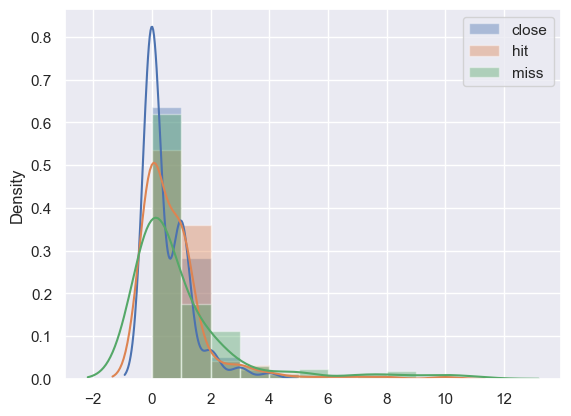

In [93]:
fig, ax = plt.subplots()
sns.distplot(close_len, bins=range(10), ax=ax, label='close')
sns.distplot(hit_len, bins=range(10), ax=ax, label='hit')
sns.distplot(miss_len, bins=range(10), ax=ax, label='miss')
ax.legend()
# ax.set_xlim([0, 100])

## Mistakes of guesser

In [107]:
miss_ans[:5]

['Lana_Del_Rey', 'Hannibal', 'State_of_Washington', 'Latin', 'Isolde']

In [115]:
len(miss_q), len(miss_ans)

(174, 174)

In [ ]:
for q, a in list(zip(miss_q, miss_ans)):
    